# Capítulo 1: Contexto e introdução à programação em Python

## Do Click ao Script: um diferente pensar

Talvez alguns de vocês estejam habituados a usar processadores de texto e aplicativos de planilhas, como Word e Excel.  É esperado que vocês acreditem que é sempre mais fácil executar comandos por meio de clicks ao invés de escrevê-los, ou seja, ao invés de usar scripts. Essa é a denominação dada a códigos escritos em uma linguagem de programação por diferentes profissionais visando automatizar suas tarefas. Então, vamos usar aqui essa denominação para ficar claro que esse não é um livro sobre programação, ou projeto e desenvolvimento de software. É um livro pensado para quem nunca programou e pretende iniciar na análise de dados.
Para conseguir demonstrar como a habilidade de escrever scripts pode te tornar mais produtivo, vamos supor que o IBGE publicou uma planilha atualizada com a população e o PIB para cada estado, como apresentado na Figura 1. Porém, precisamos saber a população e o PIB total do Brasil a partir desta planilha. 

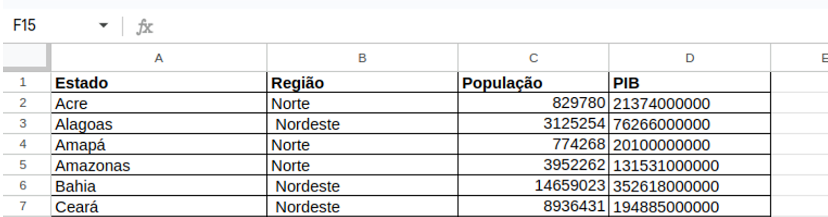

Antes de calcular a população total, primeiro teríamos que baixar e salvar essa planilha em algum local. Depois disso, vamos precisar abrir o arquivo em um programa de planilha, como o Excel, Calc (do LibreOffice) ou Google Planilhas. Com a planilha aberta, vamos executar alguns passos, que exigirão alguns clicks, como ilustrado na Figura 2. Observe, que aqui estamos calculando apenas a população total.

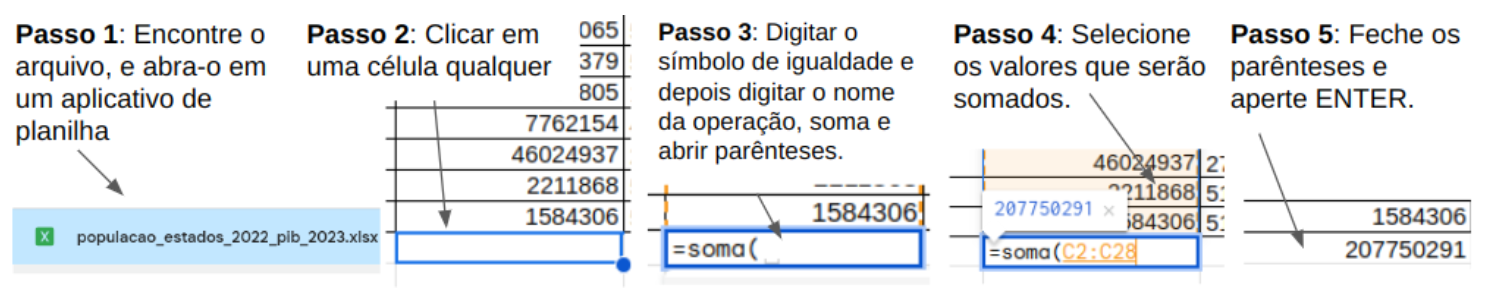

Estes passos e clicks, poderiam ser resumidos ao seguinte script.

In [14]:

import pandas as pd

url= 'https://drive.google.com/uc?id=1hw-SPd8EMBgsqXUKu3FpOhWe4NANgu30'
df = pd.read_excel(url)
print (df.População.sum())

207750291


Caso precisássemos saber o PIB total, teríamos que repetir passos similares ao da Figura 2, ou seja, clicar em uma nova célula, digitar o nome da função e selecionar os valores da coluna PIB. Utilizando o Python, com os dados já carregados e associados a variável df, bastaria:

In [9]:
print (df.PIB.sum())

9012144000000


Observe que temos na planilha uma coluna que indica qual é a região que aquele estado pertence. Será que conseguiríamos calcular a população total por região? E depois gerar um gráfico de barras?

É fácil imaginar que vamos precisar de muitos clicks para gerar o gráfico de barra da população por região, enquanto poderíamos adicionar uma linha de código ao script, como ilustra a Figura 3.

<Axes: xlabel='Região'>

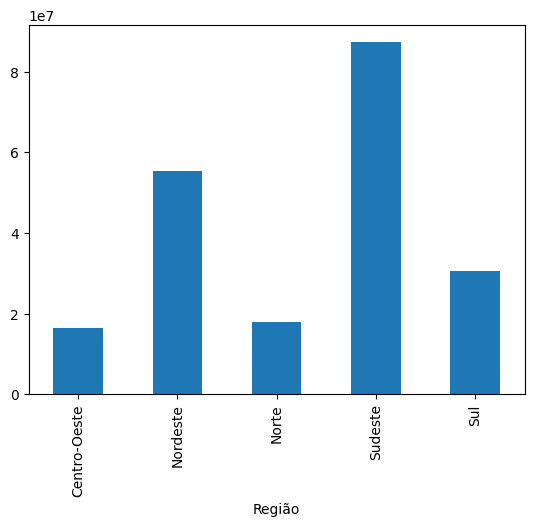

In [11]:
df.groupby(by='Região').sum()['População'].plot(kind='bar')

Em uma planilha, seria necessário repetir os mesmos passos e clicks para gerar o gráfico de barras para PIB, enquanto no script bastaria substitui a string 'População' por 'PIB':


<Axes: xlabel='Região'>

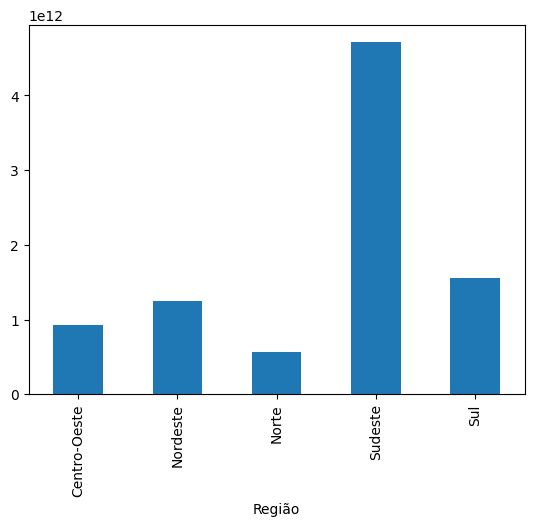

In [10]:
df.groupby(by='Região').sum()['PIB'].plot(kind='bar')

A seguir apresentamos em alto nível os passos para calcular o percentual do PIB por estado, e como poderíamos escrever esses passos usando a linguagem de programação Python e a biblioteca Pandas. Não se preocupem em entender em detalhes os códigos, foquem apenas no conceito de algoritmo. E observem que podemos realizar todos os passos com poucas linhas de código.


**Passo 1**: Coletar os dados de entrada:

In [15]:
df = pd.read_excel('https://drive.google.com/uc?id=1hw-SPd8EMBgsqXUKu3FpOhWe4NANgu30')

**Passo 2**: Calcular o PIB total

In [16]:
pib_total = df['PIB'].sum()

**Passo 3**: Calcular o percentual do PIB para cada estado

In [17]:
df['PIB Percentual'] = (df['PIB']/pib_total)*100

**Passo 4**: Retornar os percentuais.

In [18]:
df.set_index("Estado")['PIB Percentual'].sort_values(ascending=False)

Estado
São Paulo              30.178734
Rio de Janeiro         10.533576
Minas Gerais            9.515971
Rio Grande do Sul       6.450008
Paraná                  6.102577
Santa Catarina          4.755483
Bahia                   3.912698
Distrito Federal        3.183970
Goiás                   2.991830
Pará                    2.917230
Mato Grosso             2.589728
Pernambuco              2.450183
Ceará                   2.162471
Espírito Santo          2.067621
Mato Grosso do Sul      1.577915
Amazonas                1.459486
Maranhão                1.386807
Rio Grande do Norte     0.889699
Paraíba                 0.859618
Alagoas                 0.846258
Piauí                   0.710464
Rondônia                0.645462
Sergipe                 0.575457
Tocantins               0.574569
Acre                    0.237169
Amapá                   0.223032
Roraima                 0.201983
Name: PIB Percentual, dtype: float64